## SOCIAL MEDIA GROWTH SIMULATION FOR HOPE TLADI

### In this project I wanted to know how I can best grow my social media following 

In [1]:
#### the dataset used for this project is from Meta(my personal instagram account activity,intagram handle @Hope Tladi).

In [2]:

# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy import stats
import json

# Simulation and modeling
import simpy
import networkx as nx
# Mesa is typically used as a framework, not a single import

# Machine learning and forecasting
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from prophet import Prophet

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# HTML parsing and web scraping
from bs4 import BeautifulSoup
import requests

# Utility and optional tools
from faker import Faker
import datetime
import random
from joblib import Parallel, delayed


In [8]:
folder_path = r'C:\Users\tladi\Desktop\files for my instaproject'

In [9]:
## create dataframe for each and store them in a dictionary

In [10]:
import json

In [11]:
import os
# Dictionary to store each DataFrame
dataframes = {}

# Loop through JSON files and load into individual DataFrames
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            try:
                data = json.load(file)
                
                # Attempt to convert to DataFrame
                if isinstance(data, list):
                    df = pd.DataFrame(data)
                elif isinstance(data, dict):
                    df = pd.DataFrame([data])  # wrap dict into a list
                else:
                    print(f"Skipping {filename}: Unsupported data format")
                    continue
                
                # Add filename as a source column (optional but useful)
                df['source_file'] = filename
                
                # Store the DataFrame
                dataframes[filename] = df

            except json.JSONDecodeError as e:
                print(f"Error reading {filename}: {e}")

# Example: Display keys (i.e., file names)
print("Loaded DataFrames:", list(dataframes.keys()))


Loaded DataFrames: ['followers_1.json', 'following.json', 'posts_viewed.json', 'recently_unfollowed_profiles.json', 'story_likes.json', 'story_reaction_sticker_reactions.json', 'videos_watched.json']


In [12]:
## inspecting each dataframe's structure

In [13]:
for name, df in dataframes.items():
    print(f"\n{name}:")
    print(df.columns)



followers_1.json:
Index(['title', 'media_list_data', 'string_list_data', 'source_file'], dtype='object')

following.json:
Index(['relationships_following', 'source_file'], dtype='object')

posts_viewed.json:
Index(['impressions_history_posts_seen', 'source_file'], dtype='object')

recently_unfollowed_profiles.json:
Index(['relationships_unfollowed_users', 'source_file'], dtype='object')

story_likes.json:
Index(['story_activities_story_likes', 'source_file'], dtype='object')

story_reaction_sticker_reactions.json:
Index(['story_activities_reaction_sticker_reactions', 'source_file'], dtype='object')

videos_watched.json:
Index(['impressions_history_videos_watched', 'source_file'], dtype='object')


In [14]:
# flatten all dataframes

In [15]:
print(dataframes['followers_1.json'].columns)


Index(['title', 'media_list_data', 'string_list_data', 'source_file'], dtype='object')


In [16]:
def flatten_followers(df, filename):
    # Extract follower data from 'string_list_data' column
    unpacked = pd.DataFrame(df['string_list_data'].explode().tolist())
    unpacked['source_file'] = filename
    return unpacked


In [17]:
followers_df = flatten_followers(dataframes['followers_1.json'], 'followers_1.json')
followers_df['timestamp'] = pd.to_datetime(followers_df['timestamp'], unit='s', errors='coerce')


In [18]:
followers_df['date'] = followers_df['timestamp'].dt.date
followers_daily = followers_df.groupby('date').size().rename("new_followers")
print(followers_daily.head())


date
2017-08-26    1
2017-09-05    1
2017-10-30    1
2018-10-14    1
2018-12-21    1
Name: new_followers, dtype: int64


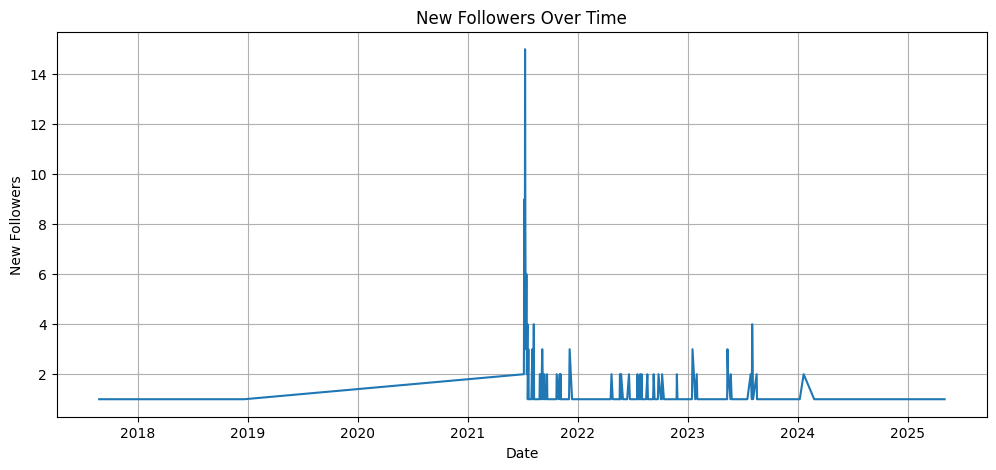

In [19]:
#Visualize Growth
#Plot your followers_daily to identify spikes:

followers_daily.plot(kind='line', figsize=(12, 5), title="New Followers Over Time")
plt.xlabel("Date")
plt.ylabel("New Followers")
plt.grid(True)
plt.show()


In [20]:
print(dataframes['story_likes.json'].columns)

Index(['story_activities_story_likes', 'source_file'], dtype='object')


In [21]:
def flatten_story_likes(df, filename):
    # Extract follower data from 'string_list_data' column
    unpacked = pd.DataFrame(df['story_activities_story_likes'].explode().tolist())
    unpacked['source_file'] = filename
    return unpacked


In [24]:
print(story_likes_df.columns)


Index(['title', 'string_list_data', 'source_file'], dtype='object')


In [27]:
story_likes_df['timestamp'] = story_likes_df['string_list_data'].apply(lambda x: x[0]['timestamp'] if isinstance(x, list) and 'timestamp' in x[0] else None)
story_likes_df['timestamp'] = pd.to_datetime(story_likes_df['timestamp'], unit='s', errors='coerce')


In [32]:
story_likes_df['date'] = story_likes_df['timestamp'].dt.date
likes_per_day = story_likes_df.groupby('date').size().reset_index(name='likes')
print(likes_per_day.head())

Empty DataFrame
Columns: [date, likes]
Index: []
